In [0]:
from google.colab import files
uploaded= files.upload()

Saving world-happiness-report-2019.csv to world-happiness-report-2019.csv


Loading the **Libraries**

In [0]:
import pandas as pd #linear algebra
import numpy as np # data preprocessing, CSV file
import seaborn as sns
import matplotlib.pyplot as plt
import os
import io


Loading the dataset


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['world-happiness-report-2019.csv']))

Let's have an Overview

In [0]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Complete Description of Data

In [0]:
df.describe(include='all')

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
unique,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,NaN,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,NaN,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,NaN,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000


Checking the missing values

In [0]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

We can clearly see the missing values:


Correlatiion Matrix

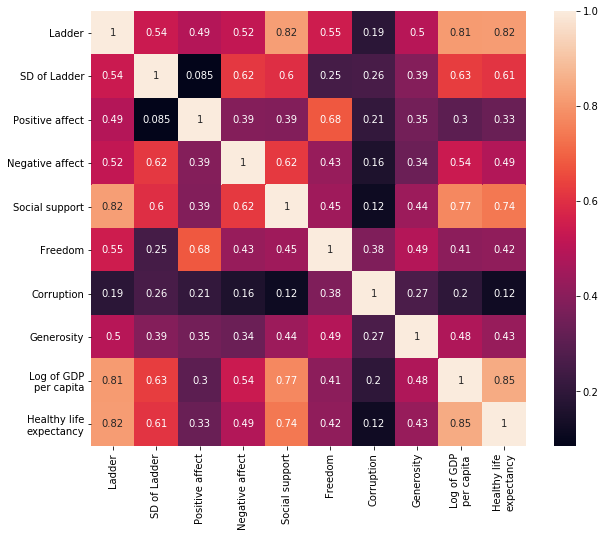

In [0]:
plt.figure(figsize=(10,8))
#Correlation Map
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True)

Imputing the missing values


In [0]:
df['Positive affect'].fillna(df['Positive affect'].mean(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].mean(),inplace=True)
df['Social support'].fillna(df['Social support'].mode(),inplace=True)
df['Freedom'].fillna(df['Freedom'].median(),inplace=True)
df['Corruption'].fillna(df['Corruption'].mean(),inplace=True)
df['Generosity'].fillna(df['Generosity'].median(),inplace=True)
df['Log of GDP\nper capita'].fillna(df['Log of GDP\nper capita'].mean(),inplace=True)
df['Healthy life\nexpectancy'].fillna(df['Healthy life\nexpectancy'].mean(),inplace=True)

Healthy Life Expectancy based on COuntry


Countries with Max Expectancy

In [0]:
print(df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy',ascending =False ).head(10))

                          Healthy life\nexpectancy
Country (region)                                  
Central African Republic                     150.0
Lesotho                                      149.0
Chad                                         148.0
Ivory Coast                                  147.0
Sierra Leone                                 146.0
Nigeria                                      145.0
Somalia                                      144.0
South Sudan                                  143.0
Mali                                         142.0
Cameroon                                     141.0


We can see that **Central African Republic** has the highest life expectancy followed by **Lesotho** and others

Visualizing the above results

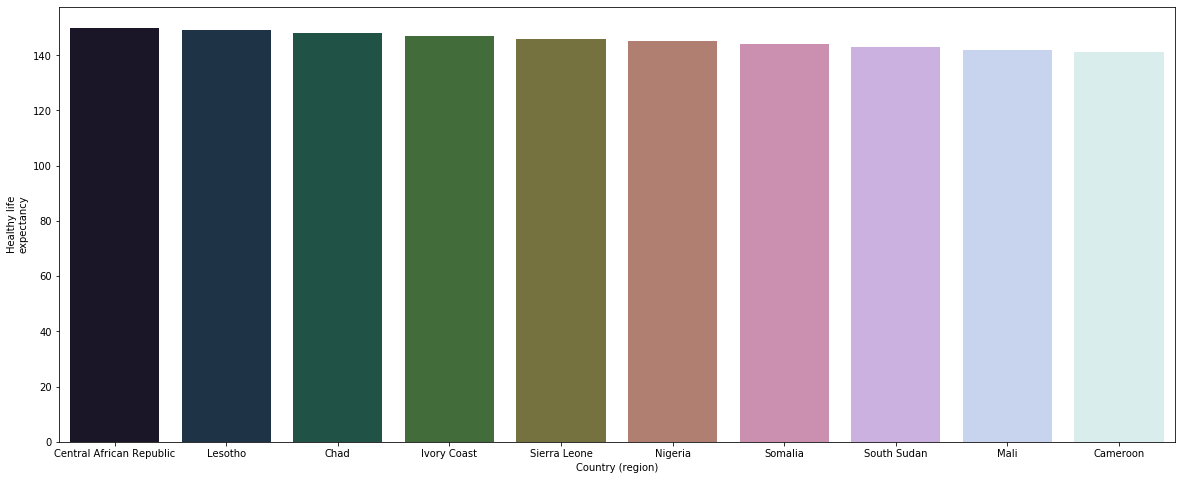

In [0]:
most_happy = df.sort_values('Healthy life\nexpectancy' , ascending= False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(most_happy['Country (region)'],most_happy['Healthy life\nexpectancy'], palette='cubehelix')

Countries with minimum expectancy

In [0]:
print(df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending = False).tail(10))

                  Healthy life\nexpectancy
Country (region)                          
Australia                             10.0
South Korea                            9.0
Canada                                 8.0
Italy                                  7.0
Cyprus                                 6.0
France                                 5.0
Switzerland                            4.0
Spain                                  3.0
Japan                                  2.0
Singapore                              1.0


We see that Singapore has minimum life expectancy. 

Visualizing the above reult

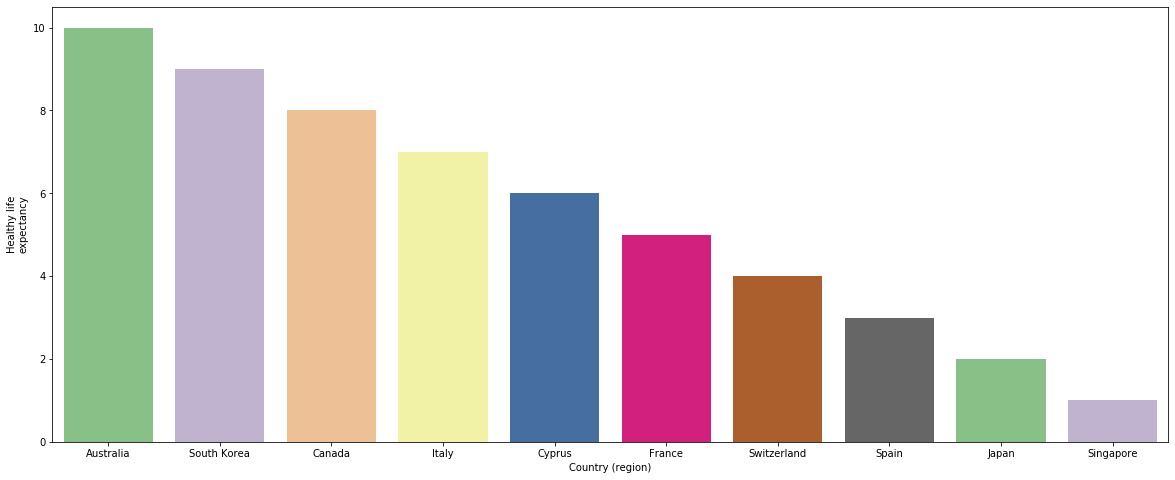

In [0]:
least_happy= df.sort_values('Healthy life\nexpectancy', ascending=False).tail(10)
plt.figure(figsize=(20,8))
sns.barplot(least_happy['Country (region)'], least_happy['Healthy life\nexpectancy'],palette='Accent')

Let's have an Overall look

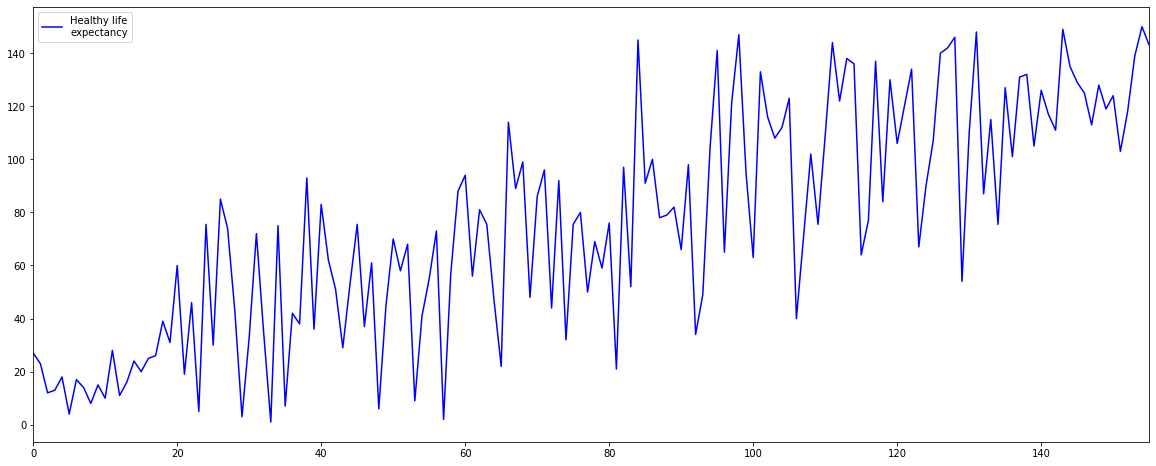

In [0]:
country_wise = df[['Country (region)', 'Healthy life\nexpectancy']]
country_wise.plot(kind = 'line',figsize=(20,8),color='b')
plt.show()

The above line plot shows the trend of the countries across the world.

**Ladder:**

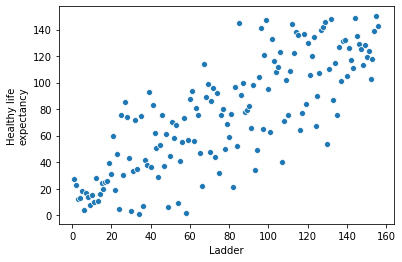

In [0]:
sns.scatterplot(x='Ladder', y='Healthy life\nexpectancy',data= df)

The above scatter plot shows the relation of Ladder with Healthy life .
The positive correlation can be observed.

**Analysing GDP**

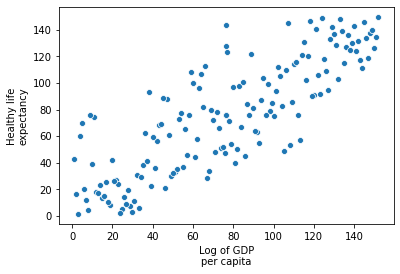

In [42]:
sns.scatterplot(x='Log of GDP\nper capita', y='Healthy life\nexpectancy', data=df)

High positive correlation can be observed.

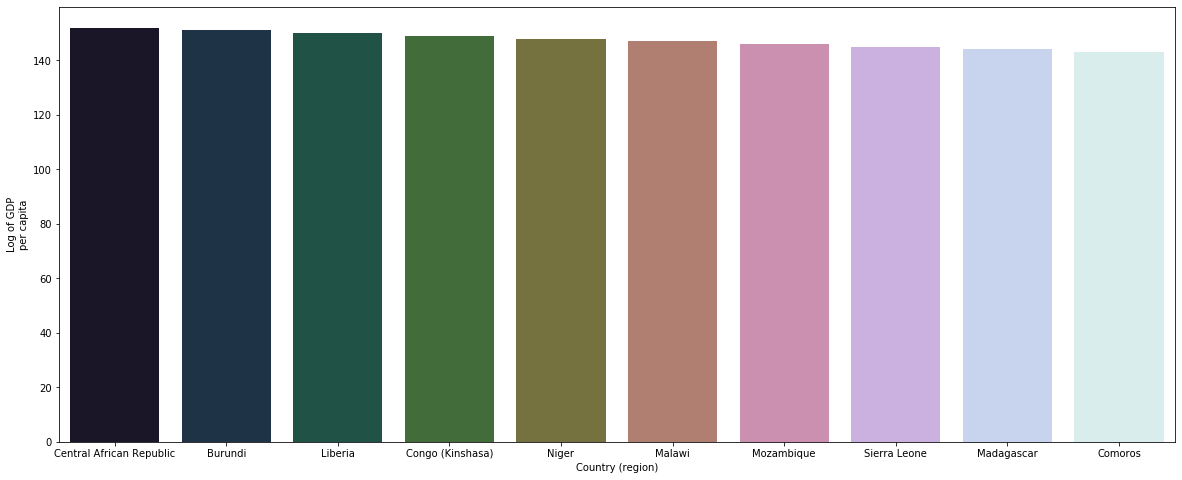

In [44]:
most_gdp = df.sort_values('Log of GDP\nper capita', ascending = False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(most_gdp['Country (region)'],most_gdp['Log of GDP\nper capita'],palette='cubehelix')

Thus we can observe that Central African Republic has the highest GDP and the Highest Life Expectancy  and hence showing some clear trends.

**Analyzing Social Support**

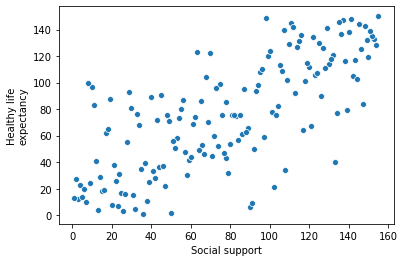

In [46]:
sns.scatterplot(x= 'Social support', y='Healthy life\nexpectancy', data =df)

We can observe positive correlation

# Results:
We see that factors like GDP, Social Support, Ladder boost the development of the society and increase Healthy life Expectancy.


# **Regression (Predicting a Country's Expectancy)**

NAme of the country and continent does not play any role so we can drop that

In [62]:
df = pd.read_csv(io.BytesIO(uploaded['world-happiness-report-2019.csv']))
df.head()
df=df.drop('Country (region)', axis=1)
df.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Importing from sklearn library

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Converting to numpy

In [0]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,:11].values

Splitting the data into test and train

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

Fitting and Predicting


In [0]:
df['Positive affect'].fillna(df['Positive affect'].mean(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].mean(),inplace=True)
df['Social support'].fillna(df['Social support'].mode(),inplace=True)
df['Freedom'].fillna(df['Freedom'].median(),inplace=True)
df['Corruption'].fillna(df['Corruption'].mean(),inplace=True)
df['Generosity'].fillna(df['Generosity'].median(),inplace=True)
df['Log of GDP\nper capita'].fillna(df['Log of GDP\nper capita'].mean(),inplace=True)
df['Healthy life\nexpectancy'].fillna(df['Healthy life\nexpectancy'].mean(),inplace=True)

In [76]:
df.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Test set Results

In [0]:
y_pred = regressor.predict(X_test)

Visualizing the Test and Predicted Data


Text(0, 0.5, 'Predicted y')

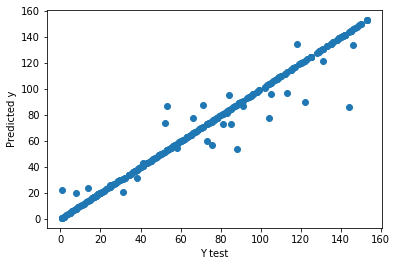

In [79]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted y')

Evaluating Results

In [87]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 1.3612989669497284
MSE 33.980029360167826
RMSE 5.829239175069747


In [83]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9778145633725079